# Emotion Mining (Amazon Reviews)

**We have extracted reviews of a product(Saregama Carvaan Mini  Music Player) form amazon website and performed emotion mining on those reviews.**

In [38]:
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##  Loading and Analysing data

In [39]:
data=pd.read_csv('reviews.csv', encoding='cp1252')
data=data.iloc[:,0:3]
data.head(10)

,s.no,review rating,review text
0,1,5,Ordered it as birthday gift for my husband as ...
1,2,1,I bought it for my old father who wants to lis...
2,3,4,I like the feature set of the product and the ...
3,4,5,"Initially wasn't sure if it's audio quality, h..."
4,5,1,The product doesn't work the box it came in di...
5,6,1,"Received a defective product, asked for replac..."
6,7,2,"After 1 year of use, this device has started s..."
7,8,2,The songs are good. The radio station performs...
8,9,4,Song collection is satisfactory. Sound quality...
9,10,2,Product is good... Sound is nice...\nBUT...onc...


### Number of Words

In [ ]:
#Number of Words in single review
data['word_count'] = data['review text'].apply(lambda x: len(str(x).split(" ")))
data[['review text','word_count']].head()

,review text,word_count
0,Ordered it as birthday gift for my husband as ...,28
1,I bought it for my old father who wants to lis...,120
2,I like the feature set of the product and the ...,118
3,"Initially wasn't sure if it's audio quality, h...",75
4,The product doesn't work the box it came in di...,90


### Number of characters

In [ ]:
#Number of characters in single review including spaces
data['char_count'] = data['review text'].str.len() 
data[['review text','char_count']].head()

,review text,char_count
0,Ordered it as birthday gift for my husband as ...,158
1,I bought it for my old father who wants to lis...,569
2,I like the feature set of the product and the ...,638
3,"Initially wasn't sure if it's audio quality, h...",427
4,The product doesn't work the box it came in di...,483


### Number of Stopwords

In [ ]:
stop = stopwords.words('english')

data['stopwords'] = data['review text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['review text','stopwords']].head()


,review text,stopwords
0,Ordered it as birthday gift for my husband as ...,10
1,I bought it for my old father who wants to lis...,59
2,I like the feature set of the product and the ...,50
3,"Initially wasn't sure if it's audio quality, h...",30
4,The product doesn't work the box it came in di...,44


In [44]:
# Total no.of stopwords in reviews

In [ ]:
data['stopwords'].sum()  


963

## Data Pre-Processing

### Converting to lower case

In [ ]:
data['review text'] = data['review text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review text'].head()


0    ordered it as birthday gift for my husband as ...
1    i bought it for my old father who wants to lis...
2    i like the feature set of the product and the ...
3    initially wasn't sure if it's audio quality, h...
4    the product doesn't work the box it came in di...
Name: review text, dtype: object

### Removing Punctuation and Special Characters

In [ ]:
data['review text'] = data['review text'].str.replace('[^\w\s]','')
data['review text'].head()

0    ordered it as birthday gift for my husband as ...
1    i bought it for my old father who wants to lis...
2    i like the feature set of the product and the ...
3    initially wasnt sure if its audio quality howe...
4    the product doesnt work the box it came in did...
Name: review text, dtype: object

### Removing of Stop Words

In [ ]:
stop = stopwords.words('english')
data['review text'] = data['review text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review text'].head()

0    ordered birthday gift husband likes old songsh...
1    bought old father wants listen fm besides musi...
2    like feature set product experience far great ...
3    initially wasnt sure audio quality however hea...
4    product doesnt work box came didnt seal box al...
Name: review text, dtype: object

### Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
review=np.array(data['review text'])
s=str(review)
s


'["Ordered it as birthday gift for my husband as he likes old songs..he just loved it.. It\'s amazing product.. Would recommend it to everyone who loves old songs"\n \'I bought it for my old father who wants to listen to FM besides music. But FM is not working at all in your instrument. I wish to return the same but return Window is closed . Please take back the same if possible as its of no use and has been kept packed. I came to know about the same a bit late as he is old and dont converse on phone and when I went to his place then I was informed on Sunday i.e. 9th January. Since the value is also too high , request you to credit my account with the amount and take back the LEGEND MUSIC SYSTEM as its of no use to him.\\n\\nTHANKS\'\n "I like the feature set of the product and the experience so far is great for me(using Bluetooth and radio mostly). The collection of oldies too is a fine blend of my favorites.\\n\\nCons: It would have been great to get a charging adapter along with the

In [48]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', '``', 'Ordered', 'it', 'as', 'birthday', 'gift', 'for', 'my', 'husband', 'as', 'he', 'likes', 'old', 'songs..he', 'just', 'loved', 'it..', 'It', "'s", 'amazing', 'product..', 'Would', 'recommend', 'it', 'to', 'everyone', 'who', 'loves', 'old', 'songs', "''", "'I", 'bought', 'it', 'for', 'my', 'old', 'father', 'who', 'wants', 'to', 'listen', 'to', 'FM', 'besides', 'music', '.', 'But', 'FM', 'is', 'not', 'working', 'at', 'all', 'in', 'your', 'instrument', '.', 'I', 'wish', 'to', 'return', 'the', 'same', 'but', 'return', 'Window', 'is', 'closed', '.', 'Please', 'take', 'back', 'the', 'same', 'if', 'possible', 'as', 'its', 'of', 'no', 'use', 'and', 'has', 'been', 'kept', 'packed', '.', 'I', 'came', 'to', 'know', 'about', 'the', 'same', 'a', 'bit', 'late', 'as', 'he', 'is', 'old', 'and', 'dont', 'converse', 'on', 'phone', 'and', 'when', 'I', 'went', 'to', 'his', 'place', 'then', 'I', 'was', 'informed', 'on', 'Sunday', 'i.e', '.', '9th', 'January', '.', 'Since', 'the', 'value', 'is', '

### Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['review text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    order birthday gift husband like old songsh lo...
1    bought old father want listen fm besid music f...
2    like featur set product experi far great meus ...
3    initi wasnt sure audio qualiti howev heard pla...
4    product doesnt work box came didnt seal box al...
Name: review text, dtype: object

### Lemmatization

In [ ]:
from textblob import Word

In [ ]:
data['review text'] = data['review text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review text'].head()

0    ordered birthday gift husband like old songshe...
1    bought old father want listen fm besides music...
2    like feature set product experience far great ...
3    initially wasnt sure audio quality however hea...
4    product doesnt work box came didnt seal box al...
Name: review text, dtype: object

## Sentiment Analysis

### Sentiment Polarity

In [ ]:
data['sentiment_polarity'] = data['review text'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['review text','sentiment_polarity']].head()

,review text,sentiment_polarity
0,ordered birthday gift husband like old songshe...,0.400000
1,bought old father want listen fm besides music...,0.017778
2,like feature set product experience far great ...,0.519444
3,initially wasnt sure audio quality however hea...,0.488889
4,product doesnt work box came didnt seal box al...,0.141667


### Sentiment

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['review text','sentiment','sentiment_polarity']]

,review text,sentiment,sentiment_polarity
0,ordered birthday gift husband like old songshe...,Positive,0.400000
1,bought old father want listen fm besides music...,Positive,0.017778
2,like feature set product experience far great ...,Positive,0.519444
3,initially wasnt sure audio quality however hea...,Positive,0.488889
4,product doesnt work box came didnt seal box al...,Positive,0.141667
5,received defective product asked replacement y...,Positive,0.137500
6,1 year use device started showing lot issue sw...,Positive,0.125000
7,song good radio station performs good auto tun...,Positive,0.333333
8,song collection satisfactory sound quality dow...,Positive,0.229167
9,product good sound nice butonce connect blueto...,Positive,0.150000


In [49]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [ ]:
count=data['sentiment'].value_counts()
count

Positive    42
Negative     4
Neutral      2
Name: sentiment, dtype: int64

In [ ]:
data

,s.no,review rating,review text,char_count,stopwords,sentiment_polarity,sentiment
0,1,5,ordered birthday gift husband like old songshe...,158,10,0.400000,Positive
1,2,1,bought old father want listen fm besides music...,569,59,0.017778,Positive
2,3,4,like feature set product experience far great ...,638,50,0.519444,Positive
3,4,5,initially wasnt sure audio quality however hea...,427,30,0.488889,Positive
4,5,1,product doesnt work box came didnt seal box al...,483,44,0.141667,Positive
5,6,1,received defective product asked replacement y...,306,19,0.137500,Positive
6,7,2,1 year use device started showing lot issue sw...,293,27,0.125000,Positive
7,8,2,song good radio station performs good auto tun...,214,12,0.333333,Positive
8,9,4,song collection satisfactory sound quality dow...,279,16,0.229167,Positive
9,10,2,product good sound nice butonce connect blueto...,412,30,0.150000,Positive


**Here we can see the reviews with high polarity have higher rating and reviews with lower polarity have low ratings**

## Visualizations

In [50]:
# By the Bargraph we can say there are more positive reviews

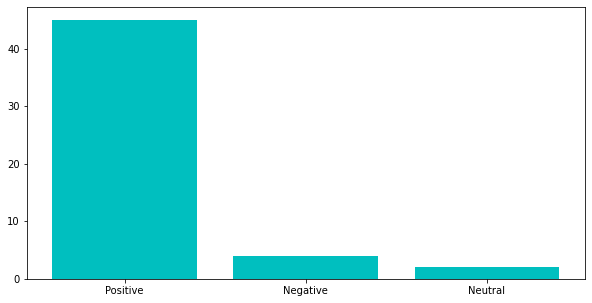

In [51]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[45,4,2]
senti=['Positive','Negative','Neutral']
plt.bar(senti,count,color='c');

In [41]:
# Joining the list into one string/text
text = ' '.join(data['review text'])
text

"Ordered it as birthday gift for my husband as he likes old songs..he just loved it.. It's amazing product.. Would recommend it to everyone who loves old songs I bought it for my old father who wants to listen to FM besides music. But FM is not working at all in your instrument. I wish to return the same but return Window is closed . Please take back the same if possible as its of no use and has been kept packed. I came to know about the same a bit late as he is old and dont converse on phone and when I went to his place then I was informed on Sunday i.e. 9th January. Since the value is also too high , request you to credit my account with the amount and take back the LEGEND MUSIC SYSTEM as its of no use to him.\n\nTHANKS I like the feature set of the product and the experience so far is great for me(using Bluetooth and radio mostly). The collection of oldies too is a fine blend of my favorites.\n\nCons: It would have been great to get a charging adapter along with the product instead 

### Word Cloud for our reviews

In [42]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


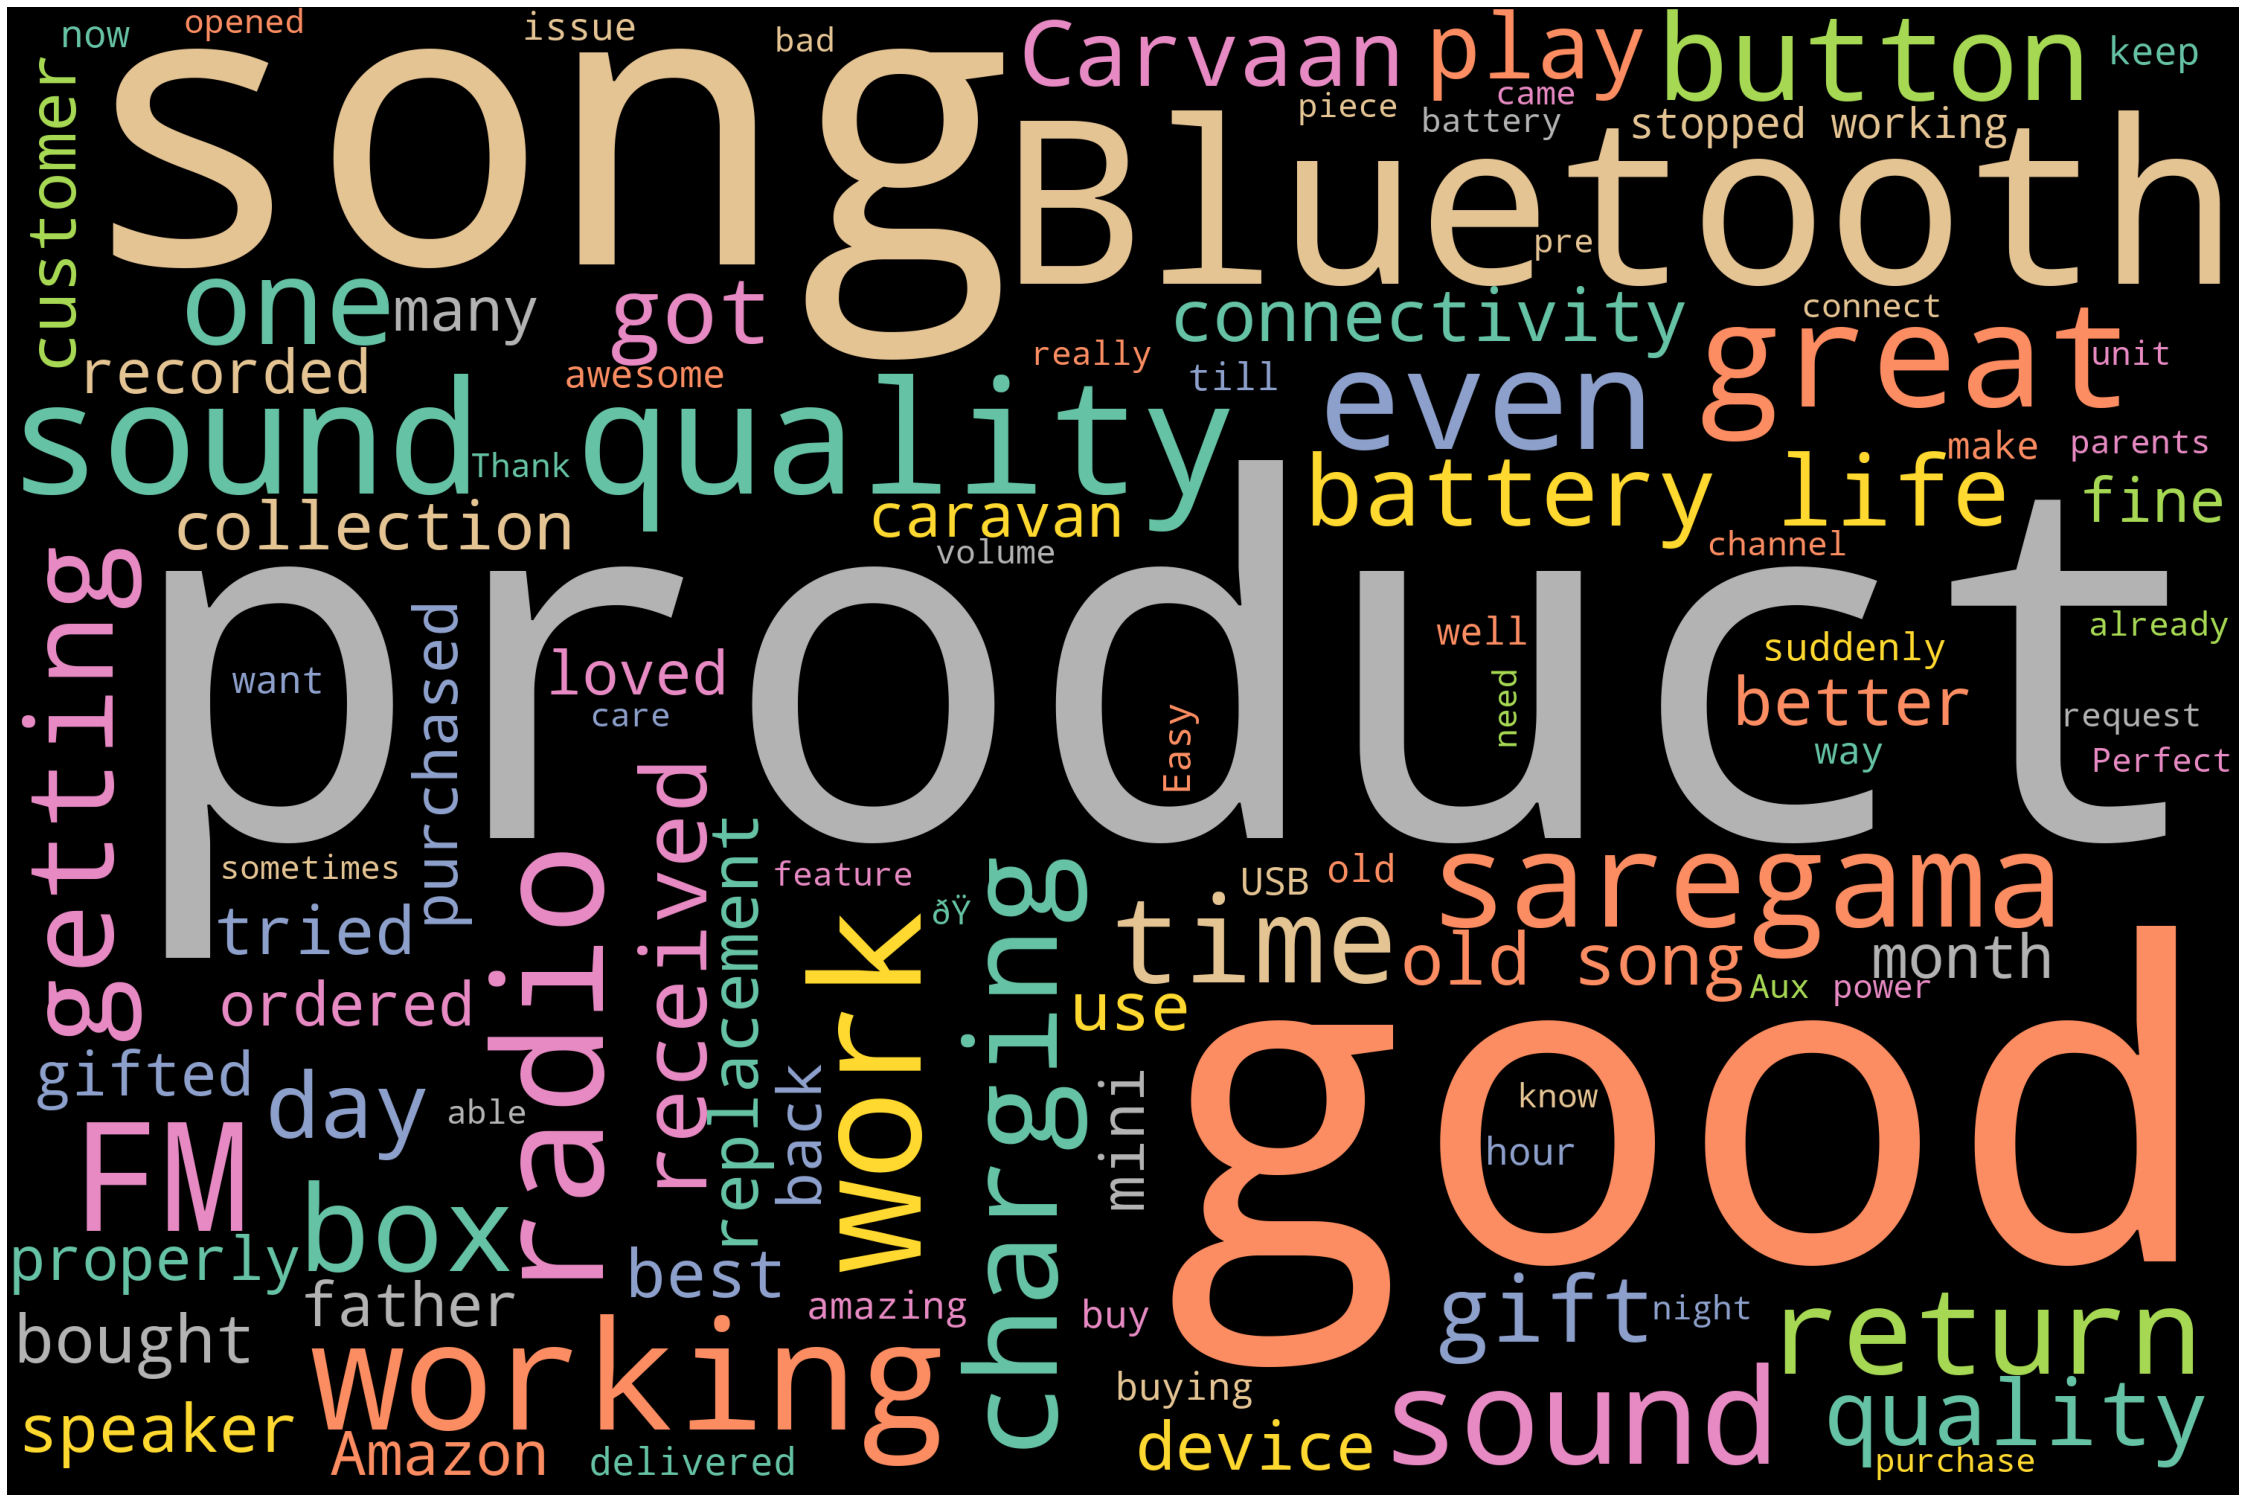

In [43]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

**These are the most repeated words according to their size in our reviews**